<a href="https://colab.research.google.com/github/kamyayuki/ronc/blob/main/L4/Segm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шаг 1. Устанавливаем библиотеку для работы с загрузкой данных по ссылке

In [ ]:
!pip install gdown


Шаг 3. Скачиваем и распаковываем файлы,з ная ID

In [5]:
import gdown

# ID файла с Google Диска
file_id = '1qVrpV7vmhIsUxFiH189LmAn0ALbAPrgS'
#https://drive.google.com/file/d/1qVrpV7vmhIsUxFiH189LmAn0ALbAPrgS/view?usp=drive_link
# Формируем URL для скачивания
url = f'https://drive.google.com/uc?id={file_id}'

# Скачиваем файл в директорию /content/
file_path = '/content/my_file_name.tar'
gdown.download(url, file_path, quiet=False)

# Распаковываем архив .tar
import tarfile
with tarfile.open(file_path, 'r') as tar:
    tar.extractall(path='/content/')
    print("Архив распакован в директорию /content/")


Downloading...
From (original): https://drive.google.com/uc?id=1qVrpV7vmhIsUxFiH189LmAn0ALbAPrgS
From (redirected): https://drive.google.com/uc?id=1qVrpV7vmhIsUxFiH189LmAn0ALbAPrgS&confirm=t&uuid=bd9776d3-167c-469b-9ff1-de38e65b569f
To: /content/my_file_name.tar
100%|██████████| 9.35G/9.35G [03:22<00:00, 46.1MB/s]


Архив распакован в директорию /content/


Шаг 4. Просматриваем структуру и описание данных в JSON

In [ ]:
import json

# Путь к файлу JSON
json_file_path = '/content/Task08_HepaticVessel/dataset.json'

# Загружаем содержимое JSON файла
with open(json_file_path, 'r') as f:
    dataset_info = json.load(f)

# Просмотрим содержимое JSON
print(json.dumps(dataset_info, indent=4))  # Красиво выводим содержимое


{
    "name": "HepaticVessel",
    "description": "Hepatic Vessels and Tumour Segmentation",
    "reference": "Memorial Sloan Kettering Cancer Center",
    "licence": "CC-BY-SA 4.0",
    "release": "1.1 14/08/2018",
    "tensorImageSize": "3D",
    "modality": {
        "0": "CT"
    },
    "labels": {
        "0": "background",
        "1": "Vessel",
        "2": "Tumour"
    },
    "numTraining": 303,
    "numTest": 140,
    "training": [
        {
            "image": "./imagesTr/hepaticvessel_001.nii.gz",
            "label": "./labelsTr/hepaticvessel_001.nii.gz"
        },
        {
            "image": "./imagesTr/hepaticvessel_002.nii.gz",
            "label": "./labelsTr/hepaticvessel_002.nii.gz"
        },
        {
            "image": "./imagesTr/hepaticvessel_004.nii.gz",
            "label": "./labelsTr/hepaticvessel_004.nii.gz"
        },
        {
            "image": "./imagesTr/hepaticvessel_005.nii.gz",
            "label": "./labelsTr/hepaticvessel_005.nii.gz"
      

Шаг 5. Выводим для просмотра 20 случайных объектов с метками из обучающего набора.

Обнаружено 303 изображений и 303 меток.
Выбран срез 72 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_127.nii.gz


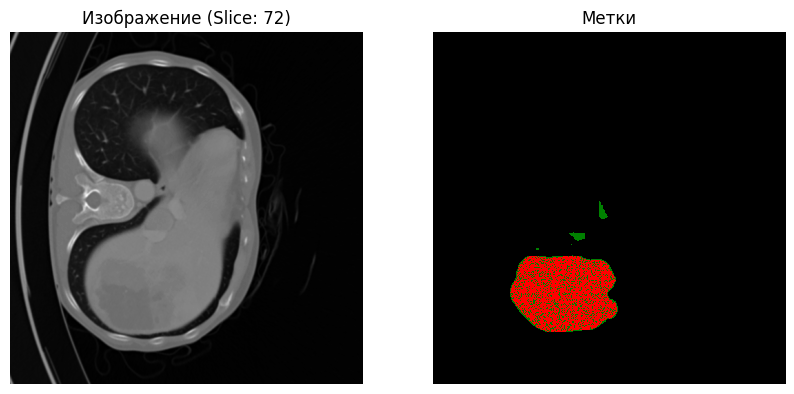

Выбран срез 85 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_031.nii.gz


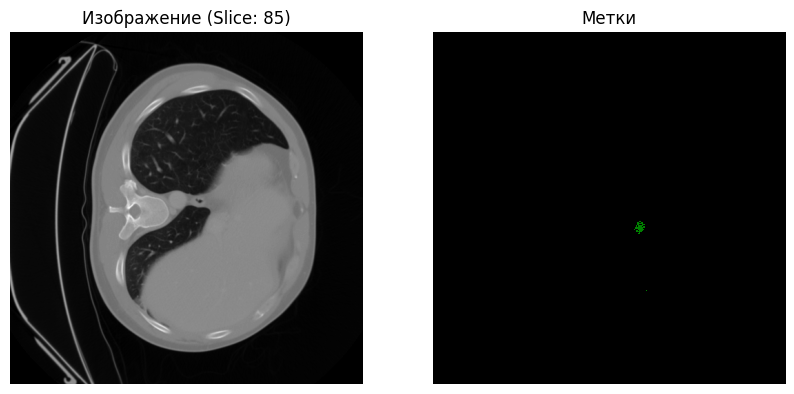

Выбран срез 31 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_433.nii.gz


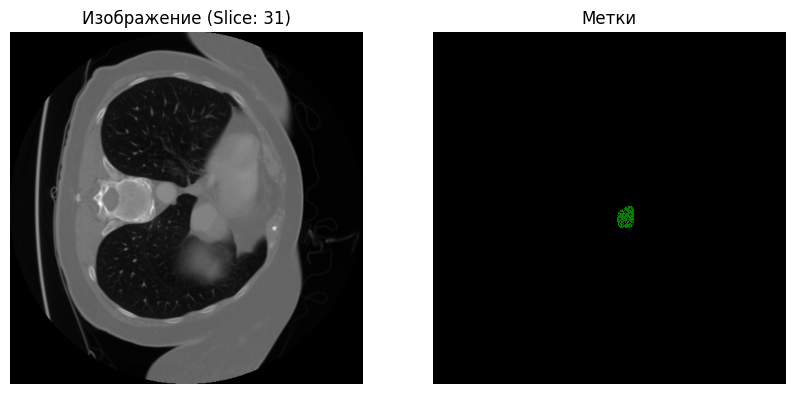

Выбран срез 15 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_282.nii.gz


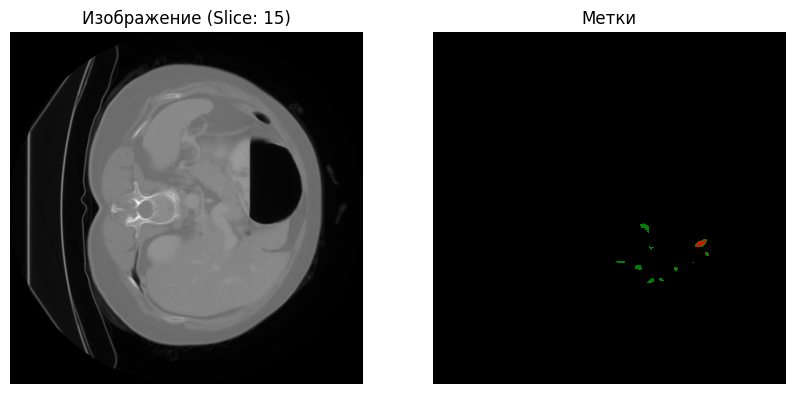

Выбран срез 28 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_233.nii.gz


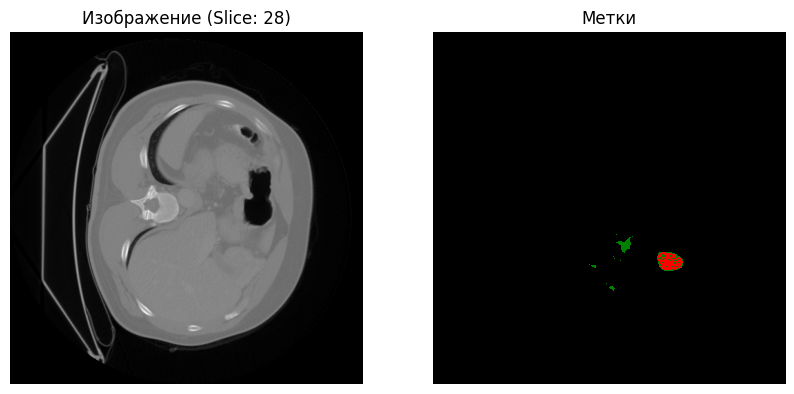

Выбран срез 32 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_115.nii.gz


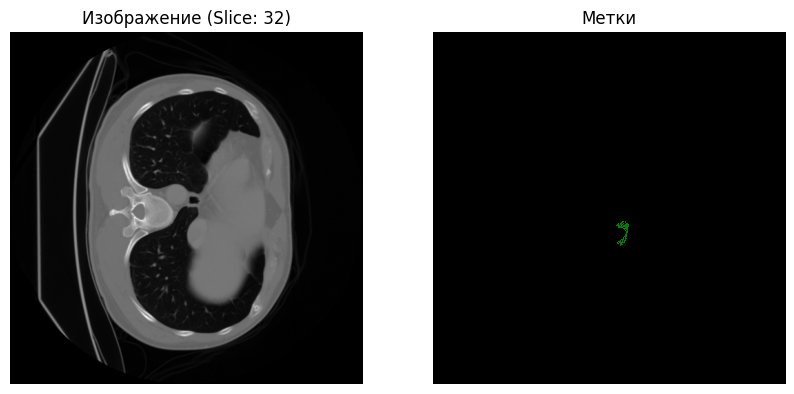

Выбран срез 23 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_427.nii.gz


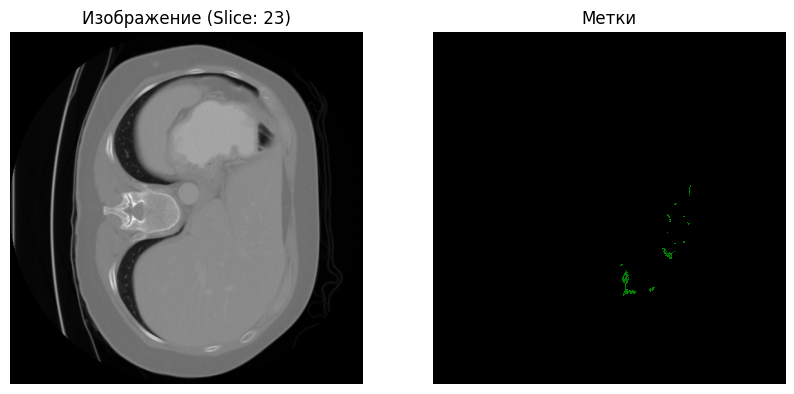

Выбран срез 23 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_325.nii.gz


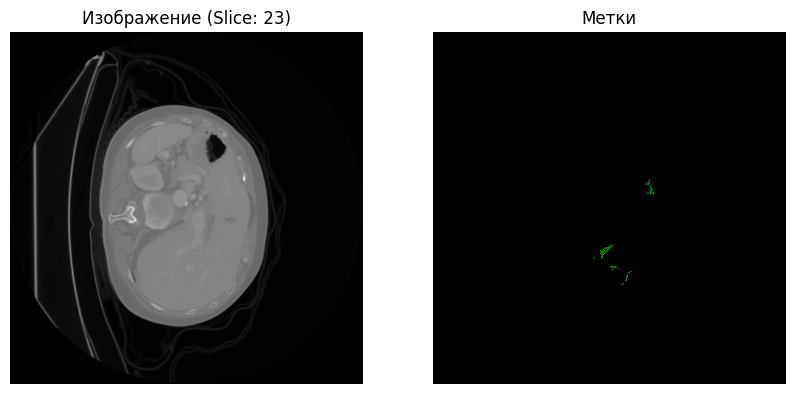

Выбран срез 14 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_359.nii.gz


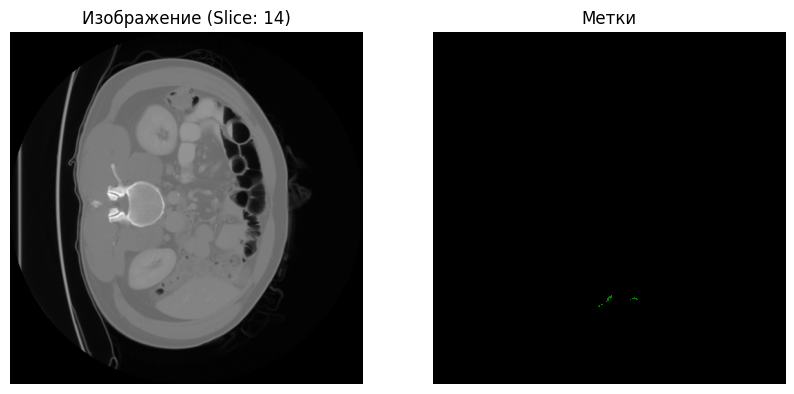

Выбран срез 22 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_007.nii.gz


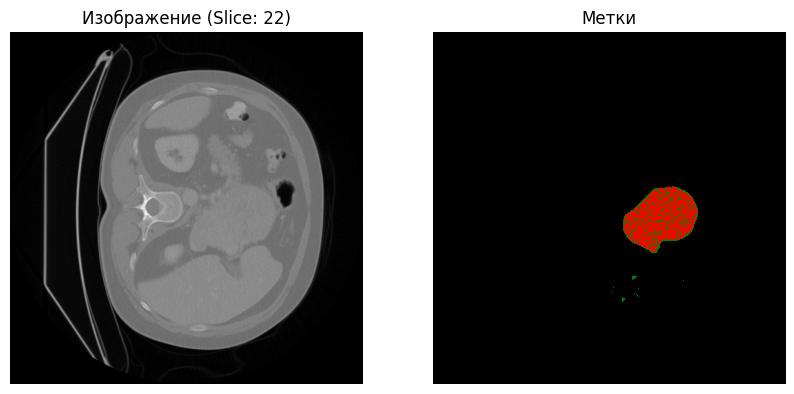

Выбран срез 17 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_441.nii.gz


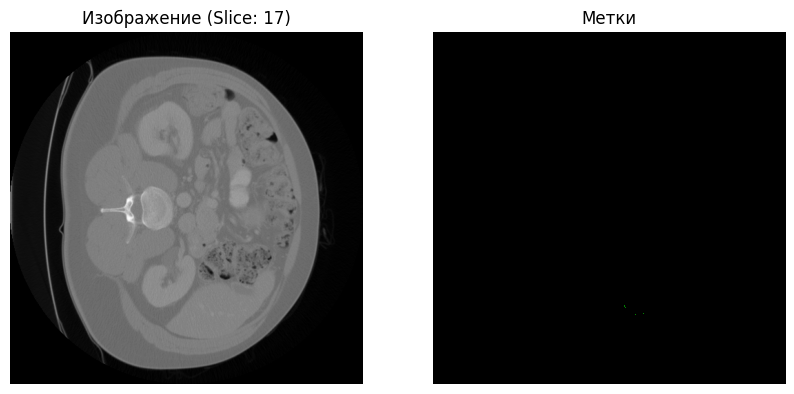

Выбран срез 30 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_072.nii.gz


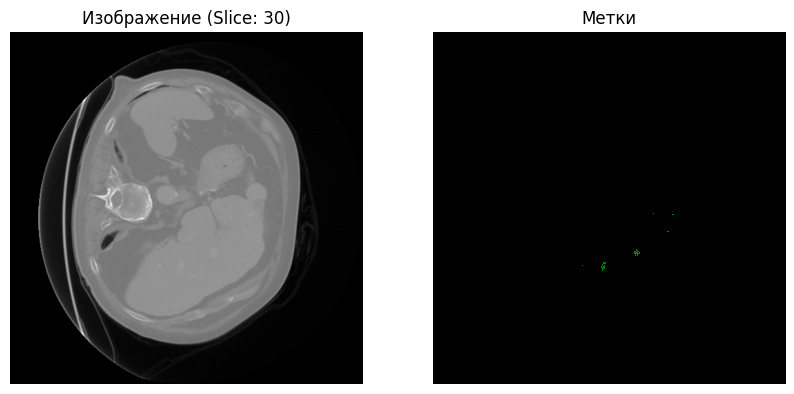

Выбран срез 20 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_222.nii.gz


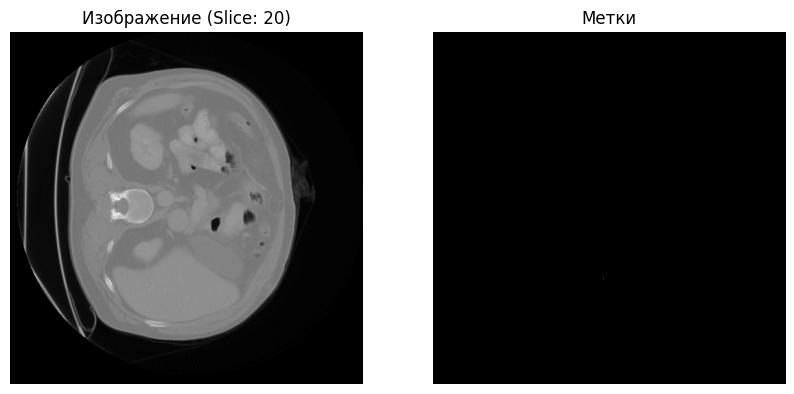

Выбран срез 26 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_119.nii.gz


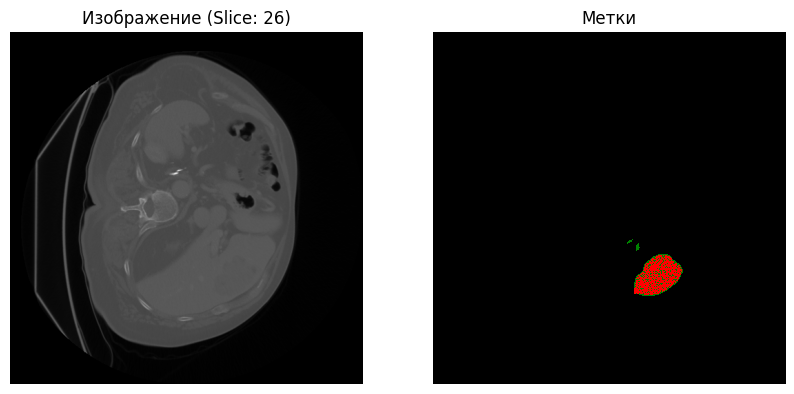

Выбран срез 12 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_236.nii.gz


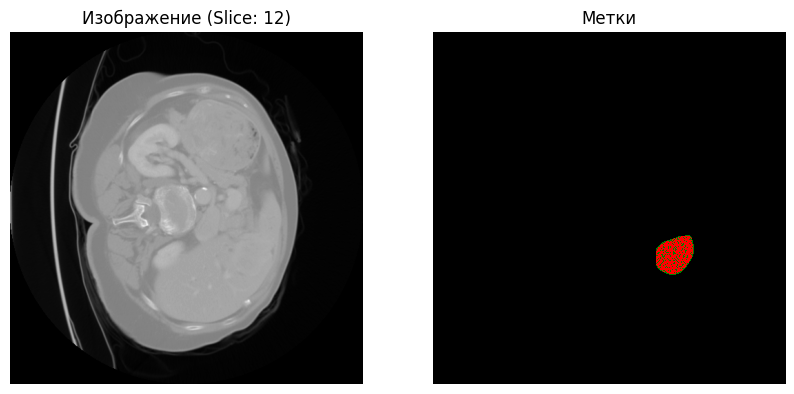

Выбран срез 39 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_196.nii.gz


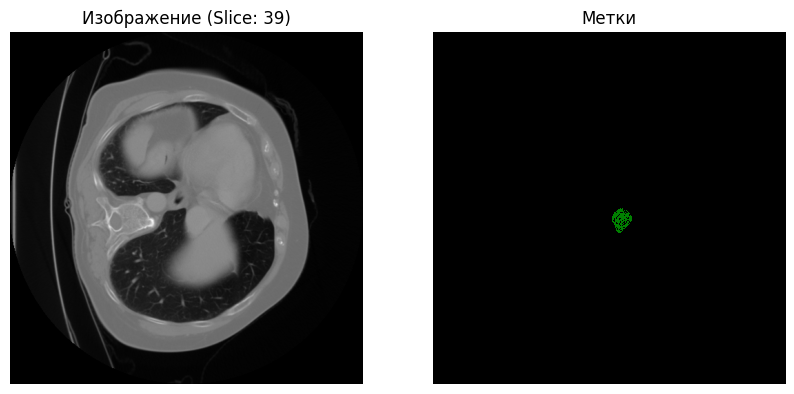

Выбран срез 12 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_246.nii.gz


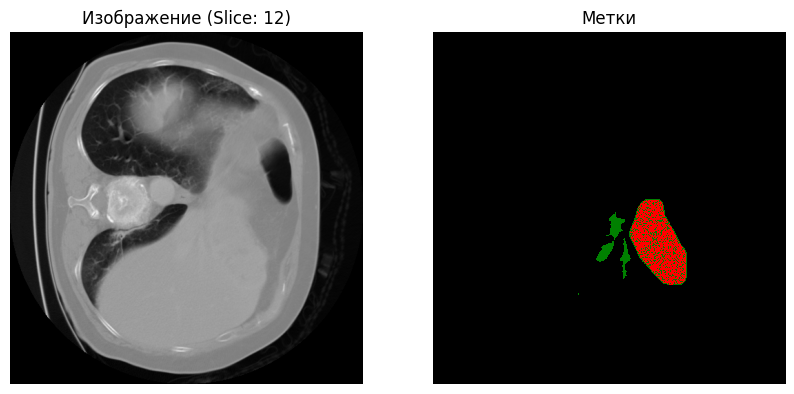

Выбран срез 26 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_057.nii.gz


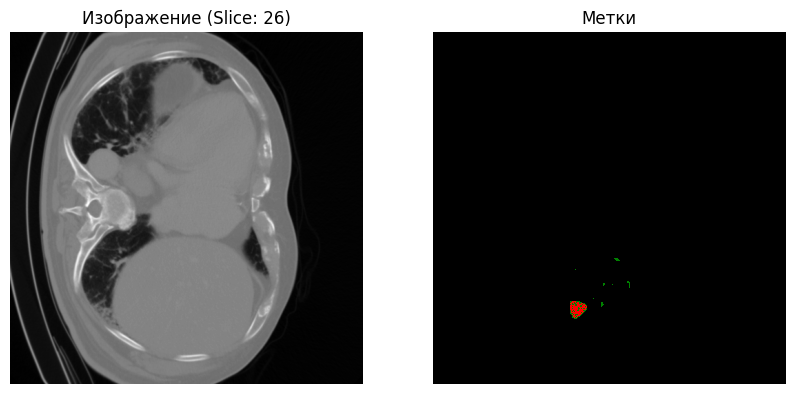

Выбран срез 27 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_040.nii.gz


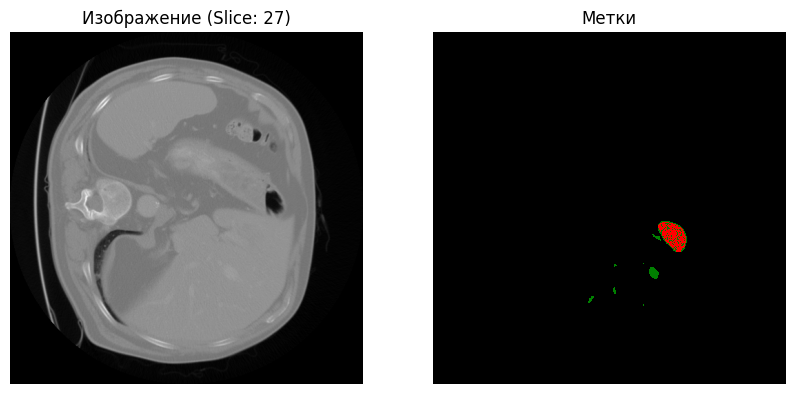

Выбран срез 56 для изображения /content/Task08_HepaticVessel/imagesTr/hepaticvessel_192.nii.gz


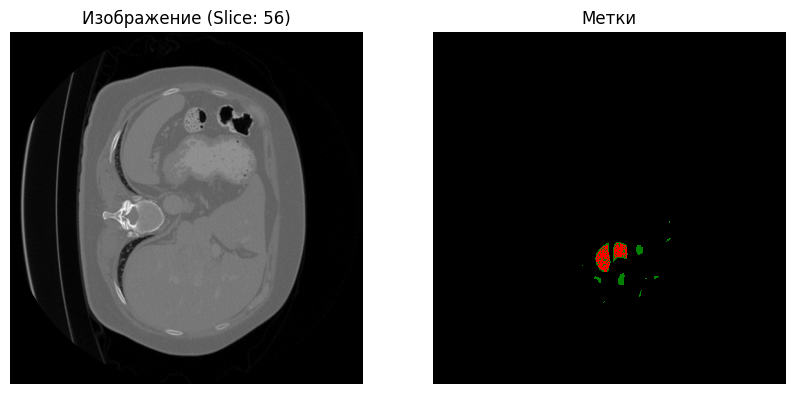

In [ ]:
import random
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Папки с изображениями и метками
images_dir = '/content/Task08_HepaticVessel/imagesTr'
labels_dir = '/content/Task08_HepaticVessel/labelsTr'

# Фильтруем доступные файлы
available_files = sorted([f for f in os.listdir(images_dir) if not f.startswith('._') and f.endswith('.nii.gz')])
images = [os.path.join(images_dir, file) for file in available_files]
labels = [os.path.join(labels_dir, file.replace('imagesTr', 'labelsTr')) for file in available_files]

# Проверяем количество файлов
print(f"Обнаружено {len(images)} изображений и {len(labels)} меток.")

# Случайно выбираем 20 изображений
random_indices = random.sample(range(len(images)), min(20, len(images)))

# Цветовая карта для меток
cmap = plt.cm.colors.ListedColormap(['black', 'green', 'red'])  # Цвета: фон, сосуды, опухоли
bounds = [0, 1, 2, 3]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Визуализация изображений и меток
for idx in random_indices:
    try:
        # Загружаем изображение и метку
        image = nib.load(images[idx]).get_fdata()
        label = nib.load(labels[idx]).get_fdata()

        # Поиск срезов с ненулевыми метками
        non_empty_slices = [z for z in range(label.shape[2]) if np.unique(label[:, :, z]).size > 1]

        if not non_empty_slices:
            print(f"Все срезы в {images[idx]} содержат только фон.")
            continue

        # Выбираем случайный срез с ненулевыми метками
        slice_index = random.choice(non_empty_slices)
        print(f"Выбран срез {slice_index} для изображения {images[idx]}")

        plt.figure(figsize=(10, 5))

        # Отображаем изображение
        plt.subplot(1, 2, 1)
        plt.imshow(image[:, :, slice_index], cmap='gray')
        plt.title(f'Изображение (Slice: {slice_index})')
        plt.axis('off')

        # Отображаем метки
        plt.subplot(1, 2, 2)
        plt.imshow(label[:, :, slice_index], cmap=cmap, norm=norm)
        plt.title('Метки')
        plt.axis('off')

        plt.show()

    except Exception as e:
        print(f"Ошибка при обработке файла {images[idx]}: {e}")


In [ ]:
!pip install tensorflow torch monai SimpleITK nibabel matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 16.6 MB/s eta 0:00:00


SVM Добавим уменьшение количества объектов за счет подготовки файлов:

Обнаружено 303 изображений и 303 меток.
Используется изображение номер 300 из 303.
Размер обучающей выборки: 48519 объектов
Размер тестовой выборки: 5391 объектов
Начало обучения SVM-классификатора...
Прошло 2.0 минут с начала обучения...
Обучение завершено за 2.00 минут.
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85      5204
         1.0       0.11      1.00      0.20        65
         2.0       0.12      0.98      0.22       122

    accuracy                           0.75      5391
   macro avg       0.41      0.91      0.42      5391
weighted avg       0.97      0.75      0.83      5391



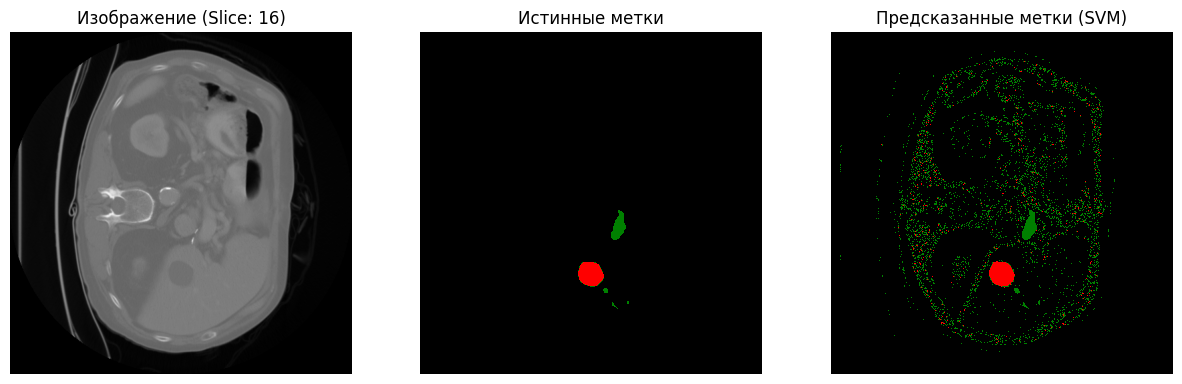

In [ ]:
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nibabel as nib
import random

# Определяем пути к папкам с изображениями и метками
images_dir = '/content/Task08_HepaticVessel/imagesTr'  # Замените на путь к вашей папке с изображениями
labels_dir = '/content/Task08_HepaticVessel/labelsTr'  # Замените на путь к вашей папке с метками

# Фильтруем доступные файлы изображений и меток
images = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.nii.gz') and not f.startswith('._')])
labels = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.nii.gz') and not f.startswith('._')])

# Проверяем количество файлов
if len(images) == 0 or len(labels) == 0:
    raise ValueError("Не найдено изображений или меток для обучения. Проверьте путь к данным.")
print(f"Обнаружено {len(images)} изображений и {len(labels)} меток.")

# Функция для извлечения признаков из изображения
def extract_features(image, slice_index):
    # Используем интенсивности пикселей как признаки
    slice_data = image[:, :, slice_index]
    features = []
    for x in range(slice_data.shape[0]):
        for y in range(slice_data.shape[1]):
            features.append([slice_data[x, y]])
    return np.array(features), slice_data.shape

# Функция для подготовки данных для SVM
def prepare_data(image, label, slice_index):
    X, shape = extract_features(image, slice_index)
    y = np.array(label[:, :, slice_index].flatten())

    # Выбираем только участки интереса (где метки не равны нулю)
    interest_indices = np.where(y != 0)[0]
    X_interest = X[interest_indices]
    y_interest = y[interest_indices]

    # Выбираем случайно 20% фона (где метки равны нулю)
    background_indices = np.where(y == 0)[0]
    num_background_samples = int(0.2 * len(background_indices))
    sampled_background_indices = random.sample(list(background_indices), num_background_samples)
    X_background = X[sampled_background_indices]
    y_background = y[sampled_background_indices]

    # Объединяем участки интереса и случайно выбранные пиксели фона
    X_combined = np.vstack((X_interest, X_background))
    y_combined = np.hstack((y_interest, y_background))

    # Возвращаем также индексы пикселей для восстановления результата
    combined_indices = np.hstack((interest_indices, sampled_background_indices))

    return X_combined, y_combined, shape, combined_indices

# Выбираем случайное изображение и метку для обучения
random_idx = random.choice(range(len(images)))
image = nib.load(images[random_idx]).get_fdata()
label = nib.load(labels[random_idx]).get_fdata()

print(f"Используется изображение номер {random_idx + 1} из {len(images)}.")

# Поиск срезов с ненулевыми метками
non_empty_slices = [z for z in range(label.shape[2]) if np.unique(label[:, :, z]).size > 1]
if not non_empty_slices:
    raise ValueError("Все срезы содержат только фон.")

# Выбираем случайный срез с ненулевыми метками
slice_index = random.choice(non_empty_slices)

# Подготавливаем данные для обучения, используя только участки интереса и 20% фона
X, y, shape, selected_indices = prepare_data(image, label, slice_index)

# Переводим данные с GPU на CPU для работы с библиотеками scikit-learn

# Разделяем данные на обучающую и тестовую выборки (90% обучение, 10% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Выводим размеры обучающей и тестовой выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")

# Стандартизируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM-классификатор с выводом прогресса каждые 2 минуты
svm_classifier = svm.SVC(kernel='rbf', class_weight='balanced')
start_time = time.time()

print("Начало обучения SVM-классификатора...")
progress_interval = 120  # интервал прогресса в секундах (2 минуты)
last_progress_time = start_time

# Обучение модели SVM
svm_classifier.fit(X_train, y_train)

# Проверка на каждую минуту, пока не завершится обучение
while True:
    current_time = time.time()
    if current_time - last_progress_time >= progress_interval:
        elapsed_minutes = (current_time - start_time) / 60
        print(f"Прошло {elapsed_minutes:.1f} минут с начала обучения...")
        last_progress_time = current_time
    # Прерываем цикл, так как обучение уже завершено
    if current_time - start_time > 120:  # Это условие просто для завершения цикла после нескольких минут
        break

print(f"Обучение завершено за {(time.time() - start_time) / 60:.2f} минут.")

# Предсказываем метки на тестовых данных
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Применяем классификатор для сегментации всего среза
X_full = scaler.transform(X)
y_full_pred = svm_classifier.predict(X_full)

# Создаем пустое изображение для сегментации и заполняем предсказанными значениями
segmented_slice = np.zeros(shape).flatten()
segmented_slice[selected_indices] = y_full_pred

# Преобразуем сегментированное изображение обратно в двумерную форму
segmented_slice = segmented_slice.reshape(shape)

# Переводим сегментированные данные обратно на CPU для визуализации

# Определение цветовой карты для отображения меток
cmap = ListedColormap(['black', 'green', 'red'])  # Цвета для фона, участков интереса и других меток

# Визуализируем оригинальное изображение, истинные метки и предсказанные метки
plt.figure(figsize=(15, 5))

# Оригинальное изображение
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, slice_index], cmap='gray')
plt.title(f'Изображение (Slice: {slice_index})')
plt.axis('off')

# Истинные метки
plt.subplot(1, 3, 2)
plt.imshow(label[:, :, slice_index], cmap=cmap)
plt.title('Истинные метки')
plt.axis('off')

# Предсказанные метки
plt.subplot(1, 3, 3)
plt.imshow(segmented_slice, cmap=cmap)
plt.title('Предсказанные метки (SVM)')
plt.axis('off')

plt.show()


Обнаружено 606 изображений и 606 меток.
Используется изображение номер 367 из 606.
Размер обучающей выборки: 60313 объектов
Размер тестовой выборки: 6702 объектов
Начало обучения SVM-классификатора...
Прошло 2.0 минут с начала обучения...
Обучение завершено за 2.00 минут.
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      4910
         1.0       0.01      1.00      0.03         8
         2.0       0.70      0.74      0.72      1784

    accuracy                           0.82      6702
   macro avg       0.57      0.86      0.55      6702
weighted avg       0.92      0.82      0.86      6702



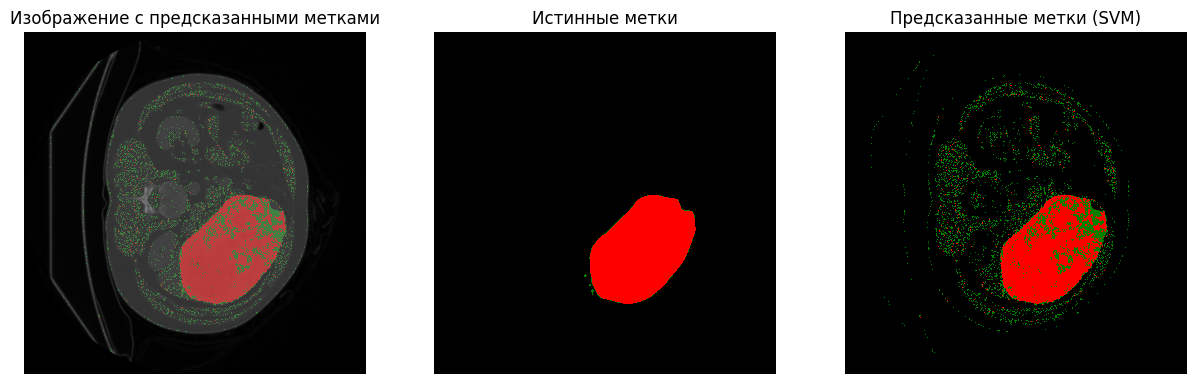

In [ ]:
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nibabel as nib
import numpy as np
import random
# Определяем пути к папкам с изображениями и метками
images_dir = '/content/Task08_HepaticVessel/imagesTr'  # Замените на путь к вашей папке с изображениями
labels_dir = '/content/Task08_HepaticVessel/labelsTr'  # Замените на путь к вашей папке с метками

# Фильтруем доступные файлы изображений и меток
images = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.nii.gz')])
labels = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.nii.gz')])

# Проверяем количество файлов
if len(images) == 0 or len(labels) == 0:
    raise ValueError("Не найдено изображений или меток для обучения. Проверьте путь к данным.")
print(f"Обнаружено {len(images)} изображений и {len(labels)} меток.")

# Функция для извлечения признаков из изображения
def extract_features(image, slice_index):
    # Используем интенсивности пикселей как признаки
    slice_data = image[:, :, slice_index]
    features = []
    for x in range(slice_data.shape[0]):
        for y in range(slice_data.shape[1]):
            features.append([slice_data[x, y]])
    return np.array(features), slice_data.shape

# Функция для получения окрестности вокруг выбранных индексов
def get_neighbors(shape, indices, radius=1):
    neighbors = set()
    for idx in indices:
        x, y = np.unravel_index(idx, shape)
        for dx in range(-radius, radius + 1):
            for dy in range(-radius, radius + 1):
                nx, ny = x + dx, y + dy
                if 0 <= nx < shape[0] and 0 <= ny < shape[1]:
                    neighbors.add(np.ravel_multi_index((nx, ny), shape))
    return list(neighbors)

# Функция для подготовки данных для SVM
def prepare_data(image, label, slice_index):
    X, shape = extract_features(image, slice_index)
    y = label[:, :, slice_index].flatten()

    # Выбираем пиксели с метками (где метки не равны нулю)
    interest_indices = np.where(y != 0)[0]

    # Добавляем 30% пикселей вокруг участков интереса
    neighbor_indices = get_neighbors(shape, interest_indices, radius=1)
    num_neighbors = int(0.3 * len(neighbor_indices))
    sampled_neighbors = random.sample(neighbor_indices, num_neighbors)

    # Выбираем 20% случайных пикселей из всего изображения, не совпадающих с предыдущими
    all_indices = set(range(len(y)))
    used_indices = set(interest_indices) | set(sampled_neighbors)
    available_indices = list(all_indices - used_indices)
    num_random_samples = int(0.2 * len(available_indices))
    sampled_background_indices = random.sample(available_indices, num_random_samples)

    # Объединяем все выбранные индексы
    combined_indices = list(set(interest_indices) | set(sampled_neighbors) | set(sampled_background_indices))

    # Подготавливаем данные для обучения
    X_combined = X[combined_indices]
    y_combined = y[combined_indices]

    return X_combined, y_combined, shape, combined_indices

# Выбираем случайное изображение и метку для обучения
random_idx = random.choice(range(len(images)))
image = nib.load(images[random_idx]).get_fdata()
label = nib.load(labels[random_idx]).get_fdata()

print(f"Используется изображение номер {random_idx + 1} из {len(images)}.")

# Поиск срезов с ненулевыми метками
non_empty_slices = [z for z in range(label.shape[2]) if np.unique(label[:, :, z]).size > 1]
if not non_empty_slices:
    raise ValueError("Все срезы содержат только фон.")

# Выбираем случайный срез с ненулевыми метками
slice_index = random.choice(non_empty_slices)

# Подготавливаем данные для обучения, используя метки, их окрестности и 20% случайных пикселей
X, y, shape, selected_indices = prepare_data(image, label, slice_index)

# Разделяем данные на обучающую и тестовую выборки (90% обучение, 10% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Выводим размеры обучающей и тестовой выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")

# Стандартизируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM-классификатор с выводом прогресса каждые 2 минуты
svm_classifier = svm.SVC(kernel='rbf', class_weight='balanced')
start_time = time.time()

print("Начало обучения SVM-классификатора...")
progress_interval = 120  # интервал прогресса в секундах (2 минуты)
last_progress_time = start_time

# Обучение модели SVM
svm_classifier.fit(X_train, y_train)

# Проверка на каждую минуту, пока не завершится обучение
while True:
    current_time = time.time()
    if current_time - last_progress_time >= progress_interval:
        elapsed_minutes = (current_time - start_time) / 60
        print(f"Прошло {elapsed_minutes:.1f} минут с начала обучения...")
        last_progress_time = current_time
    # Прерываем цикл, так как обучение уже завершено
    if current_time - start_time > 120:  # Это условие просто для завершения цикла после нескольких минут
        break

print(f"Обучение завершено за {(time.time() - start_time) / 60:.2f} минут.")

# Предсказываем метки на тестовых данных
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Применяем классификатор для сегментации всего среза
X_full = scaler.transform(X)
y_full_pred = svm_classifier.predict(X_full)

# Создаем пустое изображение для сегментации и заполняем предсказанными значениями
segmented_slice = np.zeros(shape).flatten()
segmented_slice[selected_indices] = y_full_pred

# Преобразуем сегментированное изображение обратно в двумерную форму
segmented_slice = segmented_slice.reshape(shape)

# Определение цветовой карты для отображения меток
cmap = ListedColormap(['black', 'green', 'red'])  # Цвета для фона, участков интереса и других меток

# Визуализируем оригинальное изображение, истинные метки и наложенное предсказание
plt.figure(figsize=(15, 5))

# Оригинальное изображение с наложением предсказанных меток
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, slice_index], cmap='gray')
plt.imshow(segmented_slice, cmap=cmap, alpha=0.5)  # Наложение предсказанных меток
plt.title('Изображение с предсказанными метками')
plt.axis('off')

# Истинные метки
plt.subplot(1, 3, 2)
plt.imshow(label[:, :, slice_index], cmap=cmap)
plt.title('Истинные метки')
plt.axis('off')

# Предсказанные метки (только сегментированные части)
plt.subplot(1, 3, 3)
plt.imshow(segmented_slice, cmap=cmap)
plt.title('Предсказанные метки (SVM)')
plt.axis('off')

plt.show()


На многих изображениях обучение. Добавлено условие, чтобы и в обучение и в сегментацию выбирались только изображения, содержащие метку 2.

In [1]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [3]:
!pip install cupy-cuda12x



In [ ]:
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nibabel as nib
import cupy as cp
import random
import cv2

# Определяем пути к папкам с изображениями и метками
images_dir = '/content/Task08_HepaticVessel/imagesTr'  # Замените на путь к вашей папке с изображениями
labels_dir = '/content/Task08_HepaticVessel/labelsTr'  # Замените на путь к вашей папке с метками

# Фильтруем доступные файлы изображений и меток
images = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir)
                 if f.endswith('.nii.gz') and not f.startswith('._') and not f.startswith('.')])
labels = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir)
                 if f.endswith('.nii.gz') and not f.startswith('._') and not f.startswith('.')])

# Проверяем количество файлов
if len(images) == 0 or len(labels) == 0:
    raise ValueError("Не найдено изображений или меток для обучения. Проверьте путь к данным.")
print(f"Обнаружено {len(images)} изображений и {len(labels)} меток.")

# Функция для извлечения признаков из изображения
def extract_features(image, slice_index):
    # Проверка, что индекс среза находится в пределах допустимого диапазона
    if slice_index >= image.shape[2]:
        raise IndexError(f"Индекс среза {slice_index} выходит за пределы доступных срезов {image.shape[2]}.")
    # Используем интенсивности пикселей как признаки
    slice_data = cp.array(image[:, :, slice_index], dtype=cp.float32)  # Используем cp.array для работы на GPU
    features = slice_data.flatten().reshape(-1, 1)
    return features, slice_data.shape

# Функция для получения окрестности вокруг выбранных индексов
def get_neighbors(shape, indices, radius=5):
    neighbors = set()
    height, width = shape[0], shape[1]

    for idx in indices:
        idx_int = int(idx)
        x_arr, y_arr = cp.unravel_index(cp.array(idx_int, dtype=cp.int64), shape)
        x = int(x_arr.item())
        y = int(y_arr.item())

        for dx in range(-radius, radius + 1):
            for dy in range(-radius, radius + 1):
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width:
                    # Вычисляем индекс вручную, избегая ravel_multi_index
                    neighbor_idx = nx * width + ny
                    neighbors.add(neighbor_idx)
    return list(neighbors)

# Функция для подготовки данных для SVM
def prepare_data(image, label, slice_index):
    X, shape = extract_features(image, slice_index)
    y = cp.array(label[:, :, slice_index].flatten(), dtype=cp.int32)

    # Выбираем пиксели с метками (где метки не равны нулю)
    interest_indices = cp.where(y != 0)[0]

    # Добавляем 50% пикселей вокруг участков интереса
    neighbor_indices = get_neighbors(shape, interest_indices, radius=5)
    num_neighbors = int(0.5 * len(neighbor_indices))
    sampled_neighbors = random.sample(neighbor_indices, min(num_neighbors, len(neighbor_indices)))

    # Выбираем 40% случайных пикселей из всего изображения, не совпадающих с предыдущими
    all_indices = set(range(len(y)))
    used_indices = set(interest_indices.get()) | set(sampled_neighbors)
    available_indices = list(all_indices - used_indices)
    num_random_samples = int(0.4 * len(available_indices))
    sampled_background_indices = random.sample(available_indices, min(num_random_samples, len(available_indices)))

    # Объединяем все выбранные индексы
    combined_indices = list(set(interest_indices.get()) | set(sampled_neighbors) | set(sampled_background_indices))

    # Подготавливаем данные для обучения
    X_combined = X[combined_indices]
    y_combined = y[combined_indices]

    return cp.array(X_combined, dtype=cp.float32), cp.array(y_combined, dtype=cp.int32), shape, combined_indices

# Выбираем 3 случайных изображения и метки для обучения
X_train, y_train = [], []

while len(X_train) < 3:
    idx = random.choice(range(len(images)))
    image = nib.load(images[idx]).get_fdata().astype(cp.float32)
    label = nib.load(labels[idx]).get_fdata().astype(cp.int32)

    print(f"Используется изображение номер {idx + 1} из {len(images)}.")

    # Поиск срезов с ненулевыми метками и содержащих метку 2
    non_empty_slices = []
    for z in range(label.shape[2]):
        unique_vals = cp.unique(label[:, :, z])
        if 2 in unique_vals:
            non_empty_slices.append(z)
    if not non_empty_slices:
        continue

    # Выбираем случайный срез с ненулевыми метками
    slice_index = random.choice(non_empty_slices)

    # Подготавливаем данные для обучения, используя метки, их окрестности и 40% случайных пикселей
    try:
        X, y, _, _ = prepare_data(image, label, slice_index)
        X_train.append(X)
        y_train.append(y)
    except IndexError as e:
        print(f"Ошибка при обработке изображения {idx + 1}: {e}")
        continue

X_train = cp.vstack(X_train)
y_train = cp.hstack(y_train)

# Разделяем данные на обучающую и тестовую выборки (90% обучение, 10% тест)
X_train_cpu = X_train.get()
y_train_cpu = y_train.get()
X_train_cpu, X_test_cpu, y_train_cpu, y_test_cpu = train_test_split(X_train_cpu, y_train_cpu, test_size=0.1, random_state=42)

# Выводим размеры обучающей и тестовой выборок
print(f"Размер обучающей выборки: {X_train_cpu.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test_cpu.shape[0]} объектов")

# Стандартизируем признаки
scaler = StandardScaler()
X_train_cpu = scaler.fit_transform(X_train_cpu)
X_test_cpu = scaler.transform(X_test_cpu)

# Обучаем SVM-классификатор
svm_classifier = svm.SVC(kernel='rbf', class_weight='balanced', C=0.5, gamma='scale')
print("Начало обучения SVM-классификатора...")
start_time = time.time()
svm_classifier.fit(X_train_cpu, y_train_cpu)
print(f"Обучение завершено за {(time.time() - start_time) / 60:.2f} минут.")

# Предсказываем метки на тестовых данных
y_pred_cpu = svm_classifier.predict(X_test_cpu)
print(classification_report(y_test_cpu, y_pred_cpu))

# Применяем классификатор для сегментации всего среза
segmentation_idx_candidates = [i for i in range(len(images)) if i not in range(len(X_train))]
if not segmentation_idx_candidates:
    segmentation_idx_candidates = [0]

segmentation_idx = random.choice(segmentation_idx_candidates)

image = nib.load(images[segmentation_idx]).get_fdata().astype(cp.float32)
label = nib.load(labels[segmentation_idx]).get_fdata().astype(cp.int32)
print(f"Сегментация выполняется на изображении номер {segmentation_idx + 1} из {len(images)}.")

# Поиск срезов с ненулевыми метками
non_empty_slices = []
for z in range(label.shape[2]):
    unique_vals = cp.unique(label[:, :, z])
    if 2 in unique_vals:
        non_empty_slices.append(z)

if not non_empty_slices:
    raise ValueError("Все срезы содержат только фон. Выберите другое изображение для сегментации.")

# Выбираем случайный срез с ненулевыми метками
slice_index = random.choice(non_empty_slices)

X_full, shape = extract_features(image, slice_index)
X_full_cpu = scaler.transform(X_full.get())
y_full_pred_cpu = svm_classifier.predict(X_full_cpu)

# Создаем пустое изображение для сегментации и заполняем предсказанными значениями
segmented_slice = cp.zeros(shape, dtype=cp.float32).flatten()
selected_indices = cp.array(cp.where(y_full_pred_cpu != 0)[0])
segmented_slice[selected_indices] = y_full_pred_cpu[selected_indices.get()]

# Преобразуем сегментированное изображение обратно в двумерную форму
segmented_slice = segmented_slice.reshape(shape)

# Определение цветовой карты для отображения меток
cmap = ListedColormap(['black', 'green', 'red'])  # Цвета для фона, участков интереса и других меток

# Визуализируем оригинальное изображение, истинные метки и наложенное предсказание
plt.figure(figsize=(15, 5))

# Оригинальное изображение с наложением предсказанных меток
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, slice_index].get(), cmap='gray')
plt.imshow(segmented_slice.get(), cmap=cmap, alpha=0.5)  # Наложение предсказанных меток
plt.title('Изображение с предсказанными метками')
plt.axis('off')

# Истинные метки
plt.subplot(1, 3, 2)
plt.imshow(label[:, :, slice_index].get(), cmap=cmap)
plt.title('Истинные метки')
plt.axis('off')

# Предсказанные метки (только сегментированные части)
plt.subplot(1, 3, 3)
plt.imshow(segmented_slice.get(), cmap=cmap)
plt.title('Предсказанные метки (SVM)')
plt.axis('off')

plt.show()

print("Визуализация завершена.")


Обнаружено 303 изображений и 303 меток.
Используется изображение номер 127 из 303.
Используется изображение номер 82 из 303.
Используется изображение номер 138 из 303.
Размер обучающей выборки: 292363 объектов
Размер тестовой выборки: 32485 объектов
Начало обучения SVM-классификатора...
Обучение завершено за 15.80 минут.
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     31264
           1       0.06      0.60      0.11       127
           2       0.16      0.72      0.26      1094

    accuracy                           0.84     32485
   macro avg       0.41      0.72      0.43     32485
weighted avg       0.97      0.84      0.89     32485

Сегментация выполняется на изображении номер 1 из 303.
